<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## **Generate Noisy Data**

In [2]:
def linear_fun(x, alpha, beta):
  return alpha*x+beta

In [3]:
def rational_fun(x, alpha, beta):
  return alpha/(1+beta*x)

In [4]:
alpha = np.random.rand()
beta = np.random.rand()
noise = np.random.normal(0,1,101)
print(alpha, beta)

0.7810201968991864 0.699117593522251


In [5]:
k = [*range(0, 101, 1)]
x = np.array([x/100 for x in k])
y = alpha*x + beta + noise

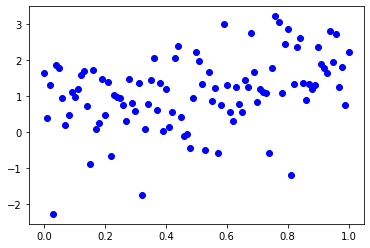

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')

In [7]:
def objective_linear(params):
  alpha, beta = params
  return np.sum(((alpha*x+beta)-y)**2)

In [8]:
def objective_rational(params):
  alpha, beta = params
  return np.sum(((alpha/(1+x*beta))-y)**2)

**Conjugate Gradient Descent**

Linear Approximant

In [9]:
initial = [0,0]
result = optimize.minimize(fun=objective_linear, x0=initial,method='CG', tol=0.001) 
result

     fun: 87.74530128568709
     jac: array([-0.00045586,  0.00010681])
 message: 'Optimization terminated successfully.'
    nfev: 52
     nit: 8
    njev: 13
  status: 0
 success: True
       x: array([1.24166376, 0.49249717])

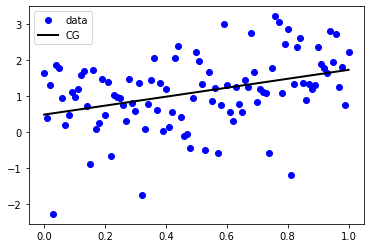

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='CG')
ax.legend()

Rational Approximant



In [11]:
initial = [0,0]
result = optimize.minimize(fun=objective_rational, x0=initial,method='CG', tol=0.001) 
result

     fun: 86.22763042538955
     jac: array([-0.00014496,  0.00018692])
 message: 'Optimization terminated successfully.'
    nfev: 120
     nit: 12
    njev: 30
  status: 0
 success: True
       x: array([ 0.66544321, -0.67811825])

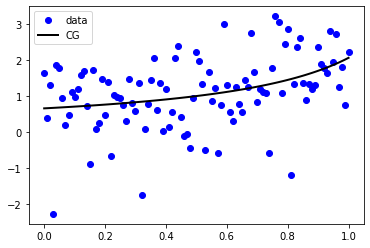

In [12]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='CG')
ax.legend()

**Newton's Method**

Linear Approximant

In [13]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_linear, 0.001)
result = optimize.minimize(fun=objective_linear, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result

     fun: 87.7453345168344
     jac: array([ 0.00012996, -0.00017804])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 0
     nit: 3
    njev: 30
  status: 0
 success: True
       x: array([1.2426584 , 0.49149938])

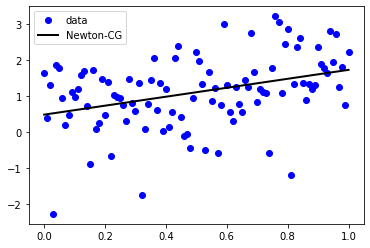

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='Newton-CG')
ax.legend()

Rational Approximant

In [15]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_rational, 0.001)
result = optimize.minimize(fun=objective_rational, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result

     fun: 86.23063522493186
     jac: array([ 0.19479755, -0.70246287])
 message: 'Optimization terminated successfully.'
    nfev: 11
    nhev: 0
     nit: 8
    njev: 46
  status: 0
 success: True
       x: array([ 0.65962475, -0.68277051])

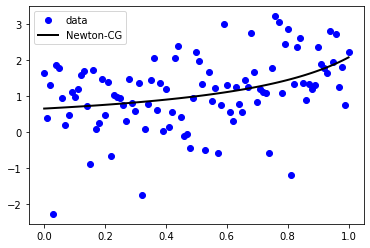

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result.x[0],result.x[1]), '-k', lw=2, label='Newton-CG')
ax.legend()

**Levenberg-Marquardt algorithm**

Linear Approximant

In [17]:
result = optimize.curve_fit(linear_fun, x, y, method='lm')[0]
result

array([1.24169346, 0.4924818 ])

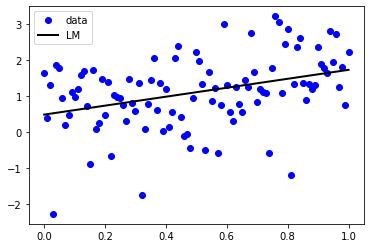

In [18]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result[0],result[1]), '-k', lw=2, label='LM')
ax.legend()

Rational Approximant

In [19]:
result = optimize.curve_fit(rational_fun, x, y, method='lm')[0]
result

array([ 0.66544594, -0.67811587])

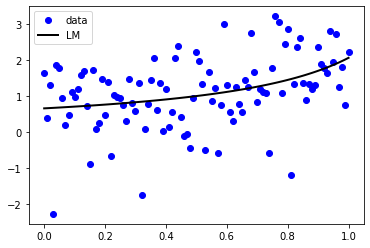

In [20]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result[0],result[1]), '-k', lw=2, label='LM')
ax.legend()

**Gradient Descent**

Linear Approximant

In [21]:
def GradientDescentLinear(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    der_alpha = np.sum(2*x*(alpha*x+beta-y))
    der_beta = np.sum(2*(alpha*x+beta-y))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [22]:
alpha, beta, iteration = GradientDescentLinear(x, y, 0, 0, 0.001)
print(alpha, beta)

1.047396357381943 0.5966108092728358


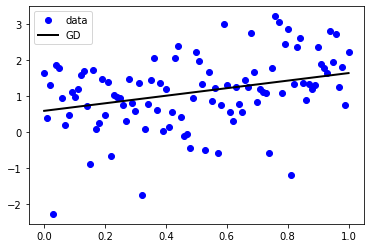

In [23]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, alpha,beta), '-k', lw=2, label='GD')
ax.legend()

Rational Approximant

In [24]:
def GradientDescentRational(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    t = (1 + beta*x)
    der_alpha = np.sum(2*((alpha/t) - y)/t)
    der_beta = np.sum(2*alpha*x*(t*y - alpha)/(t**3))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [25]:
alpha, beta, iteration = GradientDescentRational(x, y, 0, 0, 0.001)
print(alpha, beta, iteration)

0.673492679375012 -0.671692540770859 51


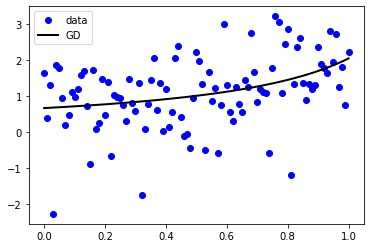

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, alpha,beta), '-k', lw=2, label='GD')
ax.legend()